### okt형태소 분석-> FreqDist 빈도 그래프re
stopwords 통합

# 빈도 분석

### -  2020_ 블로그

In [1]:
import pandas as pd
data = pd.read_excel('2020blogre.xlsx') # 2020_블로그_쌀 전처리완료 파일

## 01. okt 형태소 분석기 사용

In [2]:
# contents str로 처리
q= " "
for i in range(len(data)):
    try:
     q += data['content'][i]
    except:
     pass

In [4]:
from konlpy.tag import Okt
okt = Okt()

okt.normalize(q)

In [11]:
# 토큰화
nouns = okt.nouns(q)

In [12]:
# 원본 저장
nouns1= nouns
nouns2 =nouns

In [25]:
# 1) counter로 확인-> counter는 엑셀로 바로 저장이 안됨 
from collections import Counter
count = Counter(nouns)
count.most_common(30)

[('쌀', 43072),
 ('가루', 8635),
 ('것', 8510),
 ('밥', 8167),
 ('이유식', 7893),
 ('수', 7869),
 ('맛', 7801),
 ('때', 6883),
 ('물', 6462),
 ('더', 6395),
 ('저', 5268),
 ('미음', 4294),
 ('정도', 4084),
 ('사용', 3843),
 ('우리', 3821),
 ('빵', 3494),
 ('이', 3477),
 ('아이', 3316),
 ('보관', 3276),
 ('생각', 3253),
 ('과자', 3233),
 ('집', 3186),
 ('재료', 3077),
 ('개', 3003),
 ('시작', 2950),
 ('떡', 2942),
 ('선택', 2878),
 ('케이크', 2787),
 ('후', 2667),
 ('정말', 2650)]

In [48]:
# 2) 시리즈로 빈도확인 -> 엑셀로 바로 저장 가능
okt_series = pd.Series(nouns).value_counts()
okt_series

쌀       16251
가루       3102
이유식      2185
밥        1976
요        1922
        ...  
일제시대        1
식권          1
맛나거쥬        1
채친          1
업스셔         1
Length: 18768, dtype: int64

In [33]:
# 데이터 저장
okt_series.to_excel('okt_preprocessing_word_series_2015_cafe.xlsx',encoding='utf-8')

## 02. OKt() 선택하여 빈도분석 그래프 그리기

In [13]:
# stopwords로 제거
stopwords_nouns = ['쌀','것','더','수','선택','때','저','나','옵션','화질','완성','위','정도','다음','도','사용','제품','우리','사진','위해','먹기','내','킹','추천', #top30
                    '살짝','마음','알','꼭','손','진짜','이','아주','이용','생각','입','사람','자동','로','를','사실','용기','하나',#top50
                    '정보','추천','유통','농사','방법','나눔','가지','거','해','요','전','분','개','후','때문','또','엄마','또','이제','초기','주문','오늘','정말',
                    '시작','준비','제','안','좀','조금','바로','그','처음','그날','날','그냥','한번','번','더','것','곳','시간','중','등','말','다른','이번',
                    '걸','다시','구매','요즘' #추가제거

]

In [14]:
# 데이터 정제
for anoun in nouns2:
    if anoun in stopwords_nouns:
      nouns2.remove(anoun)

    if anoun =='아가' :
      nouns2.remove(anoun)
      nouns2.append('아이')
    
    if anoun =='아기':
      nouns2.remove(anoun)
      nouns2.append('아이')

    if anoun =='애기':
      nouns2.remove(anoun)
      nouns2.append('아이')

    if anoun == '베이':
      nouns2.remove(anoun)
      nouns2.append('베이킹')

In [15]:
# 벌레 데이터 정제
for anoun in nouns2:
    if anoun =='벌래' :
        nouns2.remove(anoun)
        nouns2.append('벌레')

    if anoun =='쌀벌래' :
        nouns2.remove(anoun)
        nouns2.append('벌레')

    if anoun =='쌀벌레' :
        nouns2.remove(anoun)
        nouns2.append('벌레')

    if anoun =='바구미' :
        nouns2.remove(anoun)
        nouns2.append('벌레')

In [16]:
#유통기한
for anoun in nouns2:
    if anoun =='기한' :
        nouns2.remove(anoun)
        nouns2.append('유통기한')

In [17]:
#배송관련
for anoun in nouns2:
    if anoun =='배송' :
        nouns2.remove(anoun)
        nouns2.append('배달')
    if anoun =='택배' :
        nouns2.remove(anoun)
        nouns2.append('배달')

In [20]:
from collections import Counter

In [21]:
# 빈도 구하기
cnt = Counter(nouns2)

In [22]:
#상위 30 키워드 빈도 확인
top30=cnt.most_common(60)
top30

[('가루', 8635),
 ('밥', 8167),
 ('이유식', 7893),
 ('맛', 7801),
 ('쌀', 6802),
 ('물', 6462),
 ('아이', 5624),
 ('미음', 4294),
 ('빵', 3494),
 ('보관', 3276),
 ('과자', 3233),
 ('집', 3186),
 ('재료', 3077),
 ('떡', 2942),
 ('케이크', 2787),
 ('만들기', 2570),
 ('현미', 2565),
 ('반죽', 2356),
 ('간식', 2296),
 ('곤약', 2196),
 ('떡볶이', 2080),
 ('것', 2057),
 ('유기농', 2047),
 ('더', 2044),
 ('소고기', 2017),
 ('밀가루', 1911),
 ('포장', 1864),
 ('느낌', 1729),
 ('설탕', 1664),
 ('쿠키', 1605),
 ('식빵', 1573),
 ('배달', 1516),
 ('백미', 1454),
 ('찹쌀', 1439),
 ('발효', 1422),
 ('누룩', 1393),
 ('향', 1377),
 ('양', 1359),
 ('버터', 1349),
 ('우유', 1307),
 ('가격', 1286),
 ('건강', 1283),
 ('치즈', 1276),
 ('소금', 1273),
 ('선물', 1252),
 ('도정', 1250),
 ('식감', 1228),
 ('저', 1226),
 ('레시피', 1204),
 ('때', 1190),
 ('크림', 1180),
 ('수', 1173),
 ('선택', 1161),
 ('음식', 1160),
 ('옵션', 1154),
 ('화질', 1153),
 ('수업', 1144),
 ('배', 1114),
 ('밥맛', 1111),
 ('가장', 1073)]

In [13]:
# 그래프 폰트 깨짐 설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

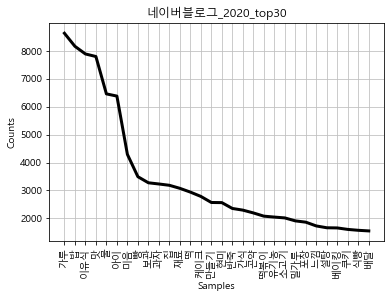

<AxesSubplot:title={'center':'네이버블로그_2020_top30'}, xlabel='Samples', ylabel='Counts'>

In [50]:
# top30 그래프 그리기
import nltk
from nltk.probability import FreqDist

fregra = nltk.FreqDist(nouns2)
# plt.xticks(fontsize=7)
fregra.plot(30, cumulative=False, color='black',
                   title="네이버블로그_2020_top30", linewidth=3 )

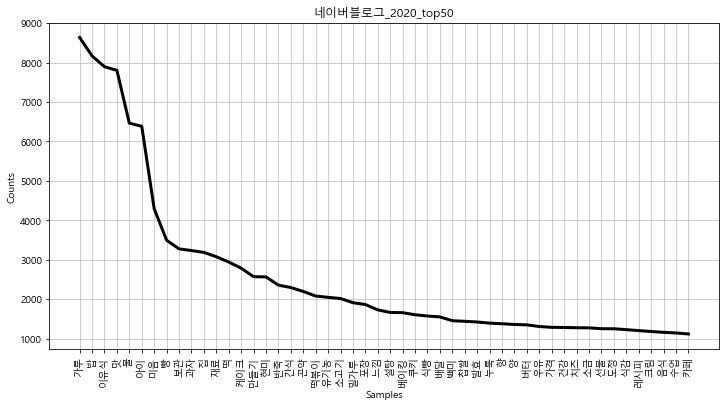

<AxesSubplot:title={'center':'네이버블로그_2020_top50'}, xlabel='Samples', ylabel='Counts'>

In [49]:
# top 50 그래프 그리기

fregra = nltk.FreqDist(nouns2)
plt.figure(figsize=(12,6))
fregra.plot(50, cumulative=False, color='black',
            title="네이버블로그_2020_top50", linewidth=3)